<a href="https://colab.research.google.com/github/asiftandel96/Data-Science-Use-Cases/blob/main/Modulat_Code_Cardio_Vescular_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT:-

We need to predict the absence of cardio vescular disease on the basis of some independent features


Dataset Description:-
    
There are 3 types of input features:

Objective: factual information;
    
Examination: results of medical examination;
    
Subjective: information given by the patient.
    
Features:

1. Age | Objective Feature | age | int (days)

2. Height | Objective Feature | height | int (cm) |

3. Weight | Objective Feature | weight | float (kg) |

4. Gender | Objective Feature | gender | categorical code |

5. Systolic blood pressure | Examination Feature | ap_hi | int |

6. Diastolic blood pressure | Examination Feature | ap_lo | int |

7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

9. Smoking | Subjective Feature | smoke | binary |

10. Alcohol intake | Subjective Feature | alco | binary |

11. Physical activity | Subjective Feature | active | binary |

Target Variable:-

12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [109]:
#Importing all the necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix,roc_curve
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

In [110]:
!pip install scikit-optimize

In [111]:
#Importing the dataset into the notebook
#Creating A Cleaning Class
class FirstProcess:
        def __init__(self):
            pass
    
        def loading_data(self,filename):
            """Loading the data"""
            df=pd.read_csv(filename,sep=';')
            return df

In [112]:
#Checking the shape of the dataset
a=FirstProcess()
df=a.loading_data('/content/sample_data/cardio_train.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [113]:
# Converting age(in days) to age in years by dividing it by 1 years=365 converting_some_data(df,'age')
df['age']=df['age']/365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [114]:
# Changing rename of the columns
df.rename(columns={"gluc":"glucose","smoke":"Smoking","alco":"Alcohol","active":"Physical_Activity",
                   "cardio":"cardio_vascular_disease"},inplace=True)

In [115]:
#Dropping id because it is a irrelevant columns
df.drop('id',axis=1,inplace=True)

In [116]:
# Checking the missing values of the dataset
df.isnull().sum()

age                        0
gender                     0
height                     0
weight                     0
ap_hi                      0
ap_lo                      0
cholesterol                0
glucose                    0
Smoking                    0
Alcohol                    0
Physical_Activity          0
cardio_vascular_disease    0
dtype: int64

In [117]:
# Checking Anomalies in the dataset(In any columns)
class Anomalies:
    def __init__(self):
        pass

    def check_anomalies(self,df,columns):
        df=df[df[columns]<0]
        return df

In [118]:
a=Anomalies()
a.check_anomalies(df,'glucose')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [119]:
a.check_anomalies(df,'weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [120]:
a.check_anomalies(df,'ap_hi')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease
4607,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0
16021,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0
20536,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0
23988,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1
25240,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1
35040,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1
46627,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0


In [121]:
a.check_anomalies(df,'ap_lo')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease
60106,61.838356,1,167,74.0,15,-70,1,1,0,0,1,1


In [122]:
#df.drop(index=[4607,16021,20536,23988,25240,35040,46627],inplace=True)

In [123]:
#df.drop(index=[60106],inplace=True)

In [124]:
a.check_anomalies(df,'cholesterol')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [125]:
a.check_anomalies(df,'Smoking')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [126]:
a.check_anomalies(df,'age')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [127]:
a.check_anomalies(df,'Alcohol')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [128]:
a.check_anomalies(df,'Physical_Activity')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [129]:
a.check_anomalies(df,'cardio_vascular_disease')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,Smoking,Alcohol,Physical_Activity,cardio_vascular_disease


In [130]:
#Exploratory Data Analysis

In [131]:
# Checking the boxplot of the Age
class Visualize:
        def __init__(self):
            pass
    
        def plot_histogram(self,df,columns):
            df=df[columns].hist()
            return df
        def plot_boxplot(self,df,columns):
            df=sns.boxplot(df[columns])
            return df

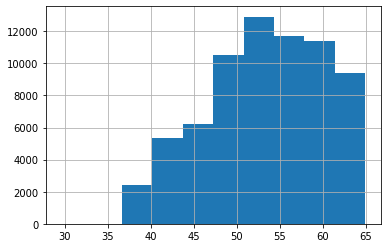

In [132]:
a=Visualize()
a.plot_histogram(df,'age')

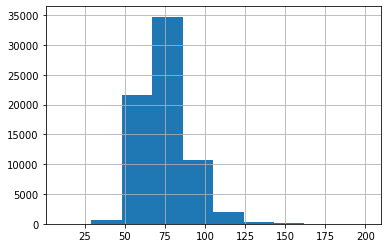

In [133]:
a.plot_histogram(df,'weight')

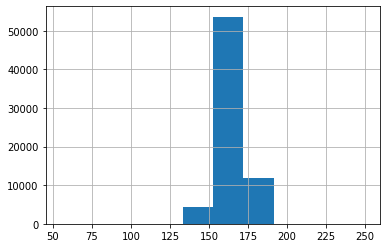

In [134]:
a.plot_histogram(df,'height')

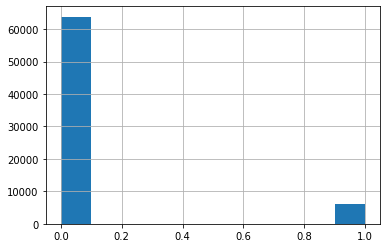

In [135]:
a.plot_histogram(df,'Smoking')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


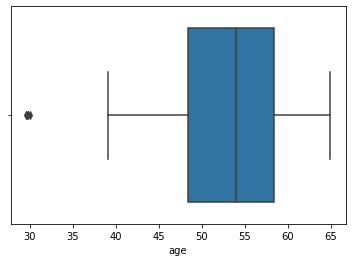

In [136]:
import seaborn as sns
a.plot_boxplot(df,'age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


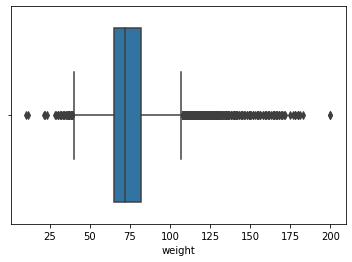

In [137]:
a.plot_boxplot(df,'weight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


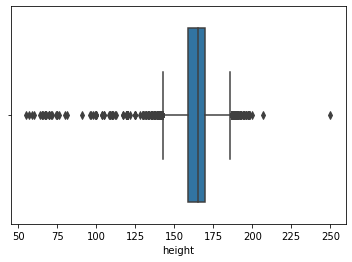

In [138]:
a.plot_boxplot(df,'height')

In [139]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'glucose', 'Smoking', 'Alcohol', 'Physical_Activity',
       'cardio_vascular_disease'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


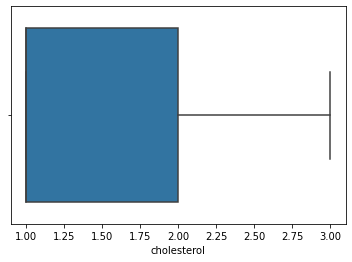

In [140]:
a.plot_boxplot(df,'cholesterol')

In [141]:
df['cardio_vascular_disease'].value_counts()

0    35021
1    34979
Name: cardio_vascular_disease, dtype: int64

In [142]:
X=df.drop('cardio_vascular_disease',axis=1)
y=df['cardio_vascular_disease']

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
print('The training data is ',X_train.shape,y_train.shape)
print('The testing data is',X_test.shape,y_test.shape)

The training data is  (52500, 11) (52500,)
The testing data is (17500, 11) (17500,)


In [144]:
class Model_Building:
    def __init__(self,Model):
        print('----Model Building----')
        print()
        self.Model=Model
    
    def fit_data(self,data,targets):
        print()
        print('----Fitting the Data to the Model')
        self.Model=self.Model.fit(data,targets)
        return self.Model
    
    def predict_data(self,data):
        print()
        self.y_pred=self.Model.predict(data)
    def result_training_data(self,y_true,y_pred):
        print()
        print('-----RESULT OF TRAINING DATA-----')
        print()
        print('-----Accuracy score for Training Data-----')
        accuracy_score_train=accuracy_score(y_true,self.Model.predict(y_pred))
        print(accuracy_score_train)
        print()
        print('-----Confusion Matrix for Training Data-----')
        print()
        confusion_matrix_train=confusion_matrix(y_true,self.Model.predict(y_pred))
        print(confusion_matrix_train)
        print()
        print('-----Classification Report of Training Data-----')
        classification_report_train=classification_report(y_true,self.Model.predict(y_pred))
        print(classification_report_train)
        print()
        print('-----roc_auc_score of Training Data------')
        roc_auc_score_train=roc_auc_score(y_true,self.Model.predict(y_pred))
        print(roc_auc_score_train)
        print()
    def result_testing_data(self,y_true,y_pred):
        print('-----RESULT OF TESTING DATA-----')
        print('-----Accuracy score for Testing Data-----')
        accuracy_score_test=accuracy_score(y_true,self.y_pred)
        print(accuracy_score_test)
        print()
        print('-----Confusion Matrix for Testing Data-----')
        confusion_matrix_test=confusion_matrix(y_true,self.y_pred)
        print(confusion_matrix_test)
        print()
        print('-----Classification Report of Testing Data-----')
        classification_report_test=classification_report(y_true,self.y_pred)
        print(classification_report_test)
        print()
        print('-----roc_auc_score of Testing Data------')
        roc_auc_score_test=roc_auc_score(y_true,self.y_pred)
        print(roc_auc_score_test)
        
    def predict_probability(self,data):
        probability=self.Model.predict_proba(data)
        return probability

In [145]:
#probs = clf_log.predict_probability(X_test)
#preds = probs[:,1]
#fpr, tpr, threshold = roc_curve(y_test, preds)
#roc_auc = auc(fpr, tpr)

In [146]:
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

In [147]:
clf_log=Model_Building(LogisticRegression())
clf_log.fit_data(X_train,y_train)
y_pred=clf_log.predict_data(X_test)
clf_log.result_training_data(y_train,X_train)
clf_log.result_testing_data(y_test,y_pred)

----Model Building----


----Fitting the Data to the Model


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7051428571428572

-----Confusion Matrix for Training Data-----

[[19452  6766]
 [ 8714 17568]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.69      0.74      0.72     26218
           1       0.72      0.67      0.69     26282

    accuracy                           0.71     52500
   macro avg       0.71      0.71      0.70     52500
weighted avg       0.71      0.71      0.70     52500


-----roc_auc_score of Training Data------
0.7051876515006332

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7083428571428572

-----Confusion Matrix for Testing Data-----
[[6607 2196]
 [2908 5789]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      8803
           1       0.72      0.67      0.69      8697

    

In [148]:
y_score = clf_log.fit_data(X_train, y_train).decision_function(X_test)
y_score


----Fitting the Data to the Model


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([-1.09873207, -0.28021967,  0.37139419, ..., -0.51022909,
       -1.74936021,  0.77169835])

In [150]:
from sklearn.metrics import auc
probs = clf_log.predict_probability(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

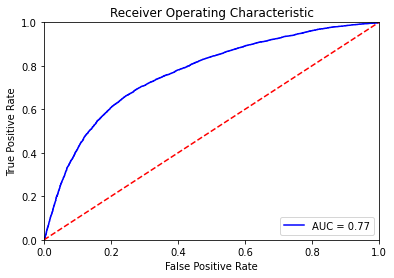

In [152]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [153]:
clf_decision=Model_Building(DecisionTreeClassifier(max_depth=8))
clf_decision.fit_data(X_train,y_train)
y_pred_decision=clf_decision.predict_data(X_test)
clf_decision.result_training_data(y_train,X_train)
clf_decision.result_testing_data(y_test,y_pred_decision)

----Model Building----


----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.742552380952381

-----Confusion Matrix for Training Data-----

[[20029  6189]
 [ 7327 18955]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     26218
           1       0.75      0.72      0.74     26282

    accuracy                           0.74     52500
   macro avg       0.74      0.74      0.74     52500
weighted avg       0.74      0.74      0.74     52500


-----roc_auc_score of Training Data------
0.7425784227124606

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7324571428571428

-----Confusion Matrix for Testing Data-----
[[6684 2119]
 [2563 6134]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      8803
 

In [154]:
probs_decision = clf_decision.predict_probability(X_test)
preds_decision = probs_decision[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_decision)
roc_auc_decision = auc(fpr, tpr)

In [155]:
print(fpr[1:5])

[0.00159037 0.00193116 0.00306714 0.00352153]


In [156]:
print(tpr[1:5])

[0.006439   0.00954352 0.01103829 0.01333793]


In [157]:
print(threshold[1:5])

[1.         0.97       0.96       0.94444444]


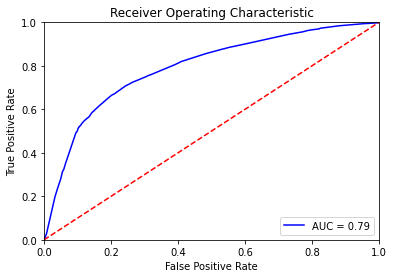

In [158]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_decision)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [159]:
param_grid=({
    'penalty':['l1','l2','elasticnet'],
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'solver':['newton-cg', 'lbfgs', 'liblinear','sag' ,'saga']
})

In [160]:
#clflog_grid=GridSearchCV(clf_log,param_grid=param_grid,scoring='f1',cv=5,verbose=3)
#clflog_grid.fit(X_train,y_train)

In [161]:
#clflog_grid.best_params_

In [162]:
#Plotting ROC_AUC Score
y_score = clf_log.fit_data(X_train, y_train).decision_function(X_test)
y_score


----Fitting the Data to the Model


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([-1.09873207, -0.28021967,  0.37139419, ..., -0.51022909,
       -1.74936021,  0.77169835])

In [163]:
probs = clf_log.predict_probability(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

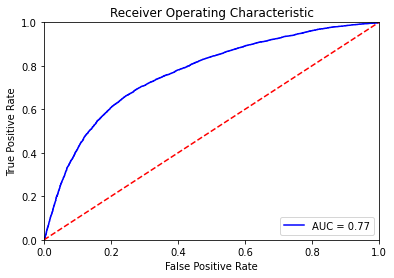

In [164]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [165]:
probs = clf_decision.predict_probability(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

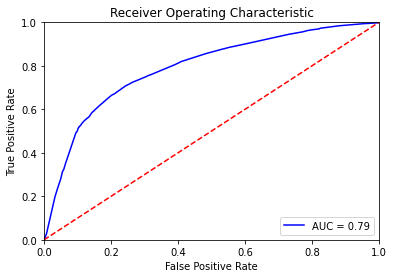

In [166]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [167]:
#param_grid_1=({
#    'criterion':['gini','entropy'],
#    'max_depth':np.arange(1,15,1),
#    'ccp_alpha':np.arange(0.1,0.5,0.01),
#})

In [168]:
#clf_decision_grid=GridSearchCV(clf_decision_tree,param_grid=param_grid_1,scoring='f1',cv=5,n_jobs=-1,
#                              verbose=5)
#clf_decision_grid.fit(X_train,y_train)

In [169]:
#clf_decision_grid.best_params_

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier

In [175]:
MLA=[
    #GLM
    LogisticRegression(C=0.2,solver='liblinear'),
    #Tree
    AdaBoostClassifier(),
    ExtraTreesClassifier(max_depth=15),
    GradientBoostingClassifier(),
    RandomForestClassifier(max_depth=15),
    DecisionTreeClassifier(max_depth=15),
    KNeighborsClassifier()
]

In [177]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [178]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA F1 Score']=f1_score(y_test,predicted)
    MLA_compare.loc[row_index,'MLA_ROC_AUC']=roc_auc_score(y_test,predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
      
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA F1 Score,MLA_ROC_AUC,MLA AUC
3,GradientBoostingClassifier,0.7391,0.7367,0.755148,0.695757,0.724237,0.736439,0.736439
4,RandomForestClassifier,0.8201,0.7357,0.757170,0.689088,0.721527,0.735377,0.735377
1,AdaBoostClassifier,0.7321,0.7292,0.769619,0.649534,0.704496,0.728720,0.728720
0,LogisticRegression,0.7183,0.7206,0.741808,0.671611,0.704967,0.720333,0.720333
5,DecisionTreeClassifier,0.8085,0.7021,0.720116,0.655283,0.686172,0.701832,0.701832
6,KNeighborsClassifier,0.7799,0.6923,0.700339,0.665632,0.682544,0.692125,0.692125
2,ExtraTreesClassifier,0.7337,0.6918,0.713455,0.634702,0.671778,0.691428,0.691428


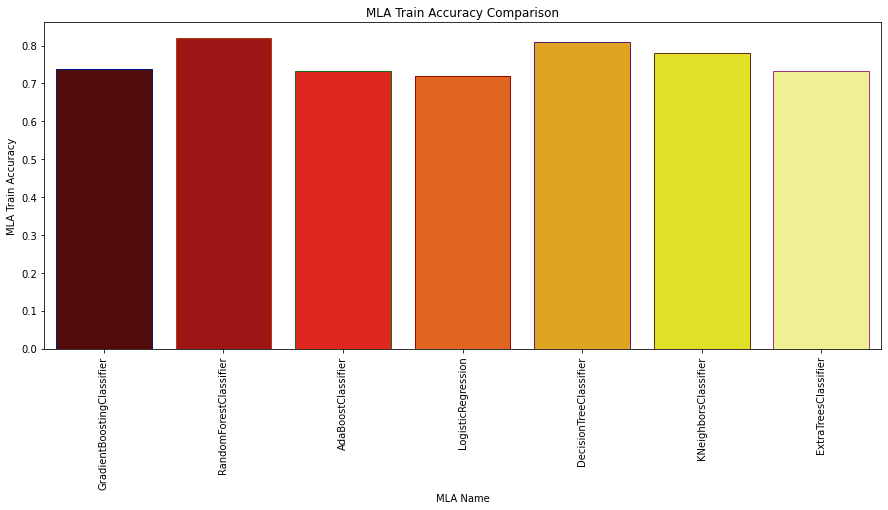

In [179]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

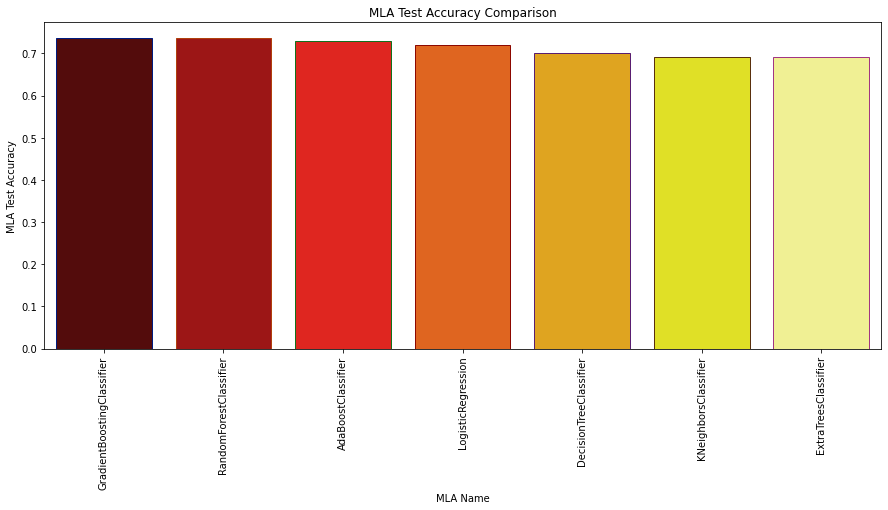

In [180]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

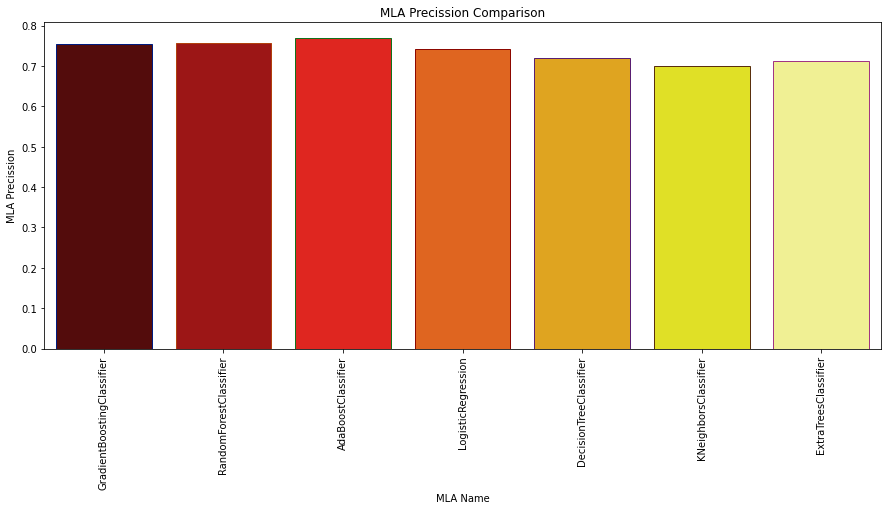

In [181]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

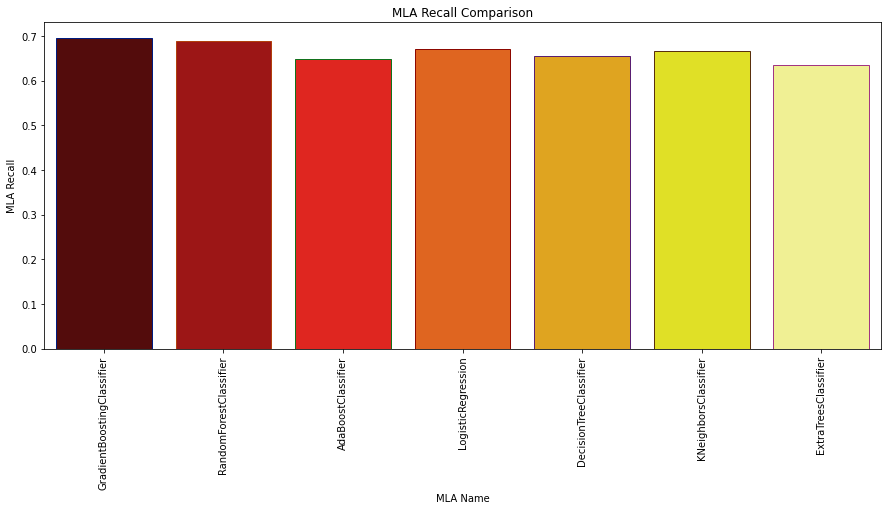

In [182]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

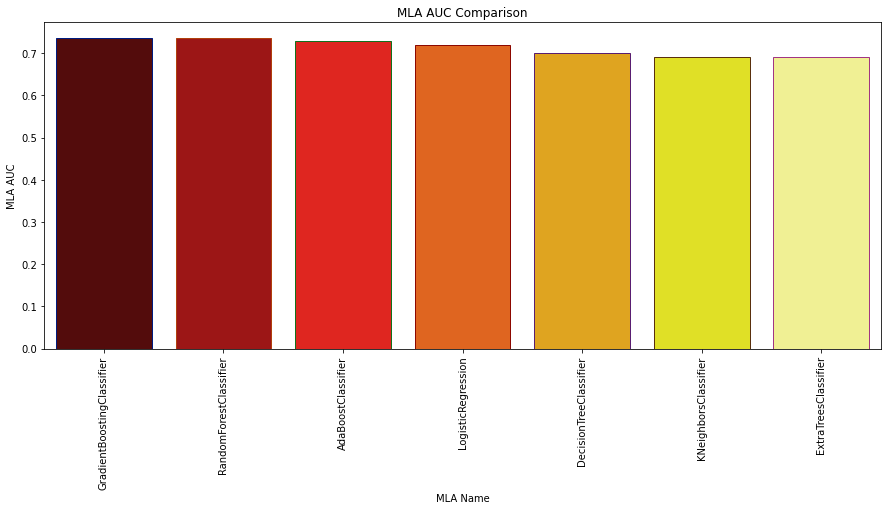

In [183]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

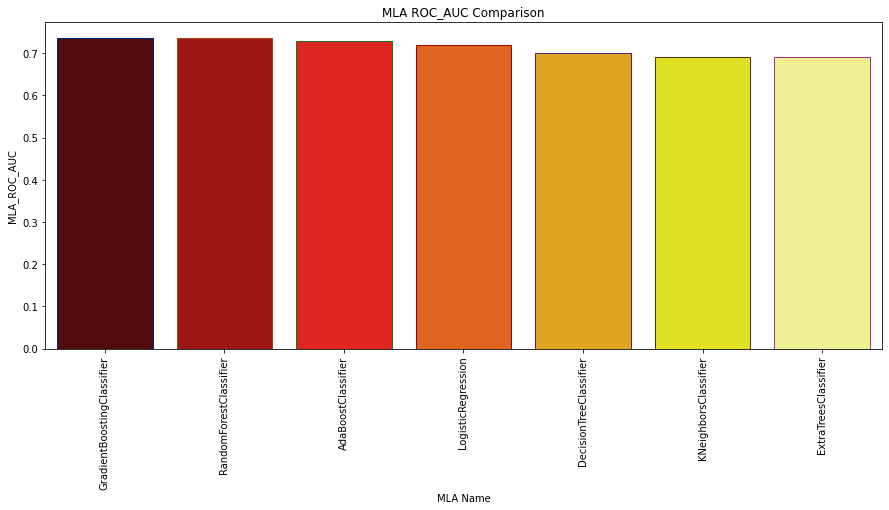

In [184]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA_ROC_AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA ROC_AUC Comparison')
plt.show()

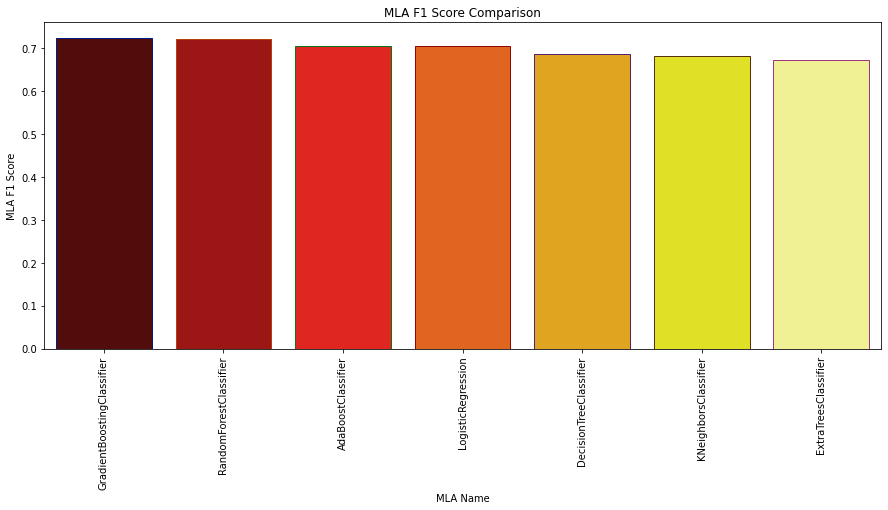

In [185]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA F1 Score",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA F1 Score Comparison')
plt.show()

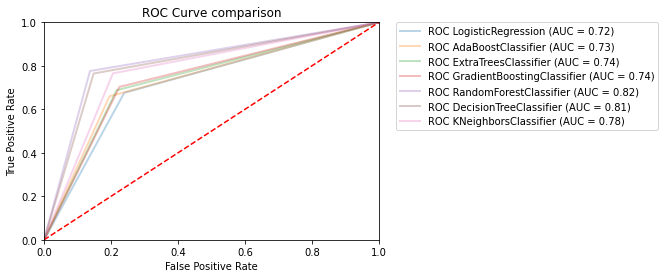

In [186]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_train,alg.predict(X_train))
    roc_auc_mla_train = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla_train))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

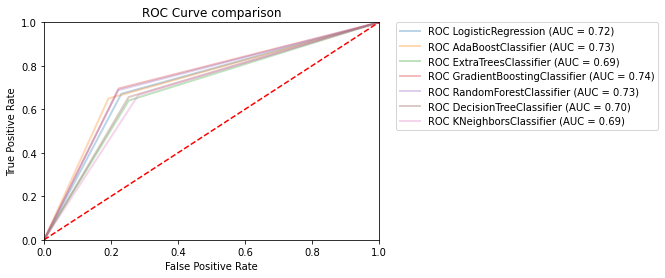

In [187]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [214]:
import numpy as np
from skopt import BayesSearchCV
search_spaces=({
    'max_depth':np.arange(1,10,1),
    'ccp_alpha':np.arange(0.01,1,0.1),
})

In [217]:
clf_decision_tree=DecisionTreeClassifier(max_depth=9,ccp_alpha=0.01)
clf_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [218]:
y_pred_de=clf_decision_tree.predict(X_test)
y_pred_de

array([0, 0, 1, ..., 0, 0, 1])

In [219]:
classification_report_decision_train=classification_report(y_train,clf_decision_tree.predict(X_train))
print(classification_report_decision_train)
classification_report_decision_test=classification_report(y_test,y_pred_de)
print(classification_report_decision_test)

              precision    recall  f1-score   support

           0       0.68      0.80      0.74     26218
           1       0.76      0.63      0.69     26282

    accuracy                           0.71     52500
   macro avg       0.72      0.71      0.71     52500
weighted avg       0.72      0.71      0.71     52500

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      8803
           1       0.76      0.62      0.68      8697

    accuracy                           0.71     17500
   macro avg       0.72      0.71      0.71     17500
weighted avg       0.72      0.71      0.71     17500



In [215]:
clf_decision_grid=BayesSearchCV(clf_decision_tree,search_spaces=search_spaces,n_iter=50,scoring='f1',verbose=5,cv=5)
clf_decision_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=5 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=5, score=0.667, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.91, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... ccp_alpha=0.91, max_depth=9, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=9, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......... ccp_alpha=0.91, max_depth=9, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=9, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV] ......... ccp_alpha=0.91, max_depth=9, score=0.667, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.81, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=4 .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.81, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=4, score=0.667, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=6 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=6, score=0.667, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.676, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.11, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=6 .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.11, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=6, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=6, score=0.667, total=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ccp_alpha=0.7100000000000001, max_depth=8 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=8 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=8 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=8 .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  ccp_alpha=0.7100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=8 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=8, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.31000000000000005, max_depth=7 ......................
[CV]  ccp_alpha=0.31000000000000005, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.31000000000000005, max_depth=7 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ccp_alpha=0.31000000000000005, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.31000000000000005, max_depth=7 ......................
[CV]  ccp_alpha=0.31000000000000005, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.31000000000000005, max_depth=7 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  ccp_alpha=0.31000000000000005, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.31000000000000005, max_depth=7 ......................
[CV]  ccp_alpha=0.31000000000000005, max_depth=7, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.21000000000000002, max_depth=7 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.21000000000000002, max_depth=7 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ccp_alpha=0.21000000000000002, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.21000000000000002, max_depth=7 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.21000000000000002, max_depth=7 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  ccp_alpha=0.21000000000000002, max_depth=7, score=0.667, total=   0.1s
[CV] ccp_alpha=0.21000000000000002, max_depth=7 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=7, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.51, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.51, max_depth=9, score=0.667, total=   0.2s
[CV] ccp_alpha=0.51, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.51, max_depth=9, score=0.667, total=   0.1s
[CV] ccp_alpha=0.51, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.51, max_depth=9, score=0.667, total=   0.1s
[CV] ccp_alpha=0.51, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.51, max_depth=9, score=0.667, total=   0.1s
[CV] ccp_alpha=0.51, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.51, max_depth=9, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.692, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.687, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.676, total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.682, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.695, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.692, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.687, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.676, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.682, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.695, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.692, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.687, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.676, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.11, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.11, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.11, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.11, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.11, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=1, score=0.667, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.31000000000000005, max_depth=2 ......................
[CV]  ccp_alpha=0.31000000000000005, max_depth=2, score=0.667, total=   0.1s
[CV] ccp_alpha=0.31000000000000005, max_depth=2 ......................
[CV]  ccp_alpha=0.31000000000000005, max_depth=2, score=0.667, total=   0.0s
[CV] ccp_alpha=0.31000000000000005, max_depth=2 ......................
[CV]  ccp_alpha=0.31000000000000005, max_depth=2, score=0.667, total=   0.0s
[CV] ccp_alpha=0.31000000000000005, max_depth=2 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  ccp_alpha=0.31000000000000005, max_depth=2, score=0.667, total=   0.0s
[CV] ccp_alpha=0.31000000000000005, max_depth=2 ......................
[CV]  ccp_alpha=0.31000000000000005, max_depth=2, score=0.667, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.91, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.91, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=3, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.21000000000000002, max_depth=1 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.21000000000000002, max_depth=1 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.21000000000000002, max_depth=1 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.21000000000000002, max_depth=1 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=1, score=0.667, total=   0.0s
[CV] ccp_alpha=0.21000000000000002, max_depth=1 ......................
[CV]  ccp_alpha=0.21000000000000002, max_depth=1, score=0.667, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.51, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.51, max_depth=2, score=0.667, total=   0.1s
[CV] ccp_alpha=0.51, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.51, max_depth=2, score=0.667, total=   0.0s
[CV] ccp_alpha=0.51, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.51, max_depth=2, score=0.667, total=   0.0s
[CV] ccp_alpha=0.51, max_depth=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.51, max_depth=2, score=0.667, total=   0.0s
[CV] ccp_alpha=0.51, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.51, max_depth=2, score=0.667, total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.81, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.81, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=3, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.7100000000000001, max_depth=4 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=4 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=4 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  ccp_alpha=0.7100000000000001, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=4 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.7100000000000001, max_depth=4 .......................
[CV]  ccp_alpha=0.7100000000000001, max_depth=4, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.682, total=   0.2s
[CV] ccp_alpha=0.01, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.695, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.692, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.687, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.676, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=8, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=5, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.682, total=   0.2s
[CV] ccp_alpha=0.01, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=9 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=9, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=7 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=7, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.6100000000000001, max_depth=8 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=8 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ccp_alpha=0.6100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=8 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=8 .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  ccp_alpha=0.6100000000000001, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.6100000000000001, max_depth=8 .......................
[CV]  ccp_alpha=0.6100000000000001, max_depth=8, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.41000000000000003, max_depth=4 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=4 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=4 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  ccp_alpha=0.41000000000000003, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=4 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=4, score=0.667, total=   0.1s
[CV] ccp_alpha=0.41000000000000003, max_depth=4 ......................
[CV]  ccp_alpha=0.41000000000000003, max_depth=4, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.682, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.695, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.692, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.687, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=1 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=1, score=0.676, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.81, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=5 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.81, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=5, score=0.667, total=   0.1s
[CV] ccp_alpha=0.81, max_depth=5 .....................................
[CV] ......... ccp_alpha=0.81, max_depth=5, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.11, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.11, max_depth=3, score=0.667, total=   0.1s
[CV] ccp_alpha=0.11, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.11, max_depth=3, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.695, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.692, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.687, total=   0.0s
[CV] ccp_alpha=0.01, max_depth=2 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=2, score=0.676, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=6 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=6, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=4 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=4, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.91, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... ccp_alpha=0.91, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=8 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ......... ccp_alpha=0.91, max_depth=8, score=0.667, total=   0.1s
[CV] ccp_alpha=0.91, max_depth=8 .....................................
[CV] ......... ccp_alpha=0.91, max_depth=8, score=0.667, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.682, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.695, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.692, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.687, total=   0.1s
[CV] ccp_alpha=0.01, max_depth=3 .....................................
[CV] ......... ccp_alpha=0.01, max_depth=3, score=0.676, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                               class_weight=None,
                                               criterion='gini', max_depth=8,
                                               max_features=None,
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               presort='deprecated',
                                               random_state=None,
                                               splitter='best'),
              fit_params=None, iid=True, n_iter=50, n_jobs=1

In [216]:
clf_decision_grid.best_params_

OrderedDict([('ccp_alpha', 0.01), ('max_depth', 9)])

In [220]:
print("train score : %s" % clf_decision_grid.best_score_)
print("test score: %s" % clf_decision_grid.score(X_test, y_test))

train score : 0.6864713672373828
test score: 0.6820311510700267
